Import Python 2 libraries

In [1]:
import pandas as pd
from sklearn import neural_network, linear_model, cross_validation,metrics,cluster
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pp

C:\Users\SomaC\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read datafiles

In [2]:
APPLE = pd.read_csv('Data/AAPL.csv')
ADOBE = pd.read_csv('Data/ADBE.csv')
GOOGLE = pd.read_csv('Data/GOOGL.csv')
MICROSOFT = pd.read_csv('Data/MSFT.csv')
NVIDIA = pd.read_csv('Data/NVDA.csv')
SONY = pd.read_csv('Data/SNE.csv')
Globals = ["APPLE", "ADOBE", "GOOGLE", "MICROSOFT", "NVIDIA", "SONY"]

Separate files by years

In [3]:
APPLE11 = pd.read_csv('Data/2011/AAPL.csv')
ADOBE11 = pd.read_csv('Data/2011/ADBE.csv')
GOOGLE11 = pd.read_csv('Data/2011/GOOGL.csv')
MICROSOFT11 = pd.read_csv('Data/2011/MSFT.csv')
NVIDIA11 = pd.read_csv('Data/2011/NVDA.csv')
SONY11 = pd.read_csv('Data/2011/SNE.csv')
dat11 = ["APPLE11", "ADOBE11", "GOOGLE11", "MICROSOFT11", "NVIDIA11", "SONY11"]

APPLE12 = pd.read_csv('Data/2012/AAPL.csv')
ADOBE12 = pd.read_csv('Data/2012/ADBE.csv')
GOOGLE12 = pd.read_csv('Data/2012/GOOGL.csv')
MICROSOFT12 = pd.read_csv('Data/2012/MSFT.csv')
NVIDIA12 = pd.read_csv('Data/2012/NVDA.csv')
SONY12 = pd.read_csv('Data/2012/SNE.csv')
dat12 = ["APPLE12", "ADOBE12", "GOOGLE12", "MICROSOFT12", "NVIDIA12", "SONY12"]

APPLE13 = pd.read_csv('Data/2013/AAPL.csv')
ADOBE13 = pd.read_csv('Data/2013/ADBE.csv')
GOOGLE13 = pd.read_csv('Data/2013/GOOGL.csv')
MICROSOFT13 = pd.read_csv('Data/2013/MSFT.csv')
NVIDIA13 = pd.read_csv('Data/2013/NVDA.csv')
SONY13 = pd.read_csv('Data/2013/SNE.csv')
dat13 = ["APPLE13", "ADOBE13", "GOOGLE13", "MICROSOFT13", "NVIDIA13", "SONY13"]

APPLE14 = pd.read_csv('Data/2014/AAPL.csv')
ADOBE14 = pd.read_csv('Data/2014/ADBE.csv')
GOOGLE14 = pd.read_csv('Data/2014/GOOGL.csv')
MICROSOFT14 = pd.read_csv('Data/2014/MSFT.csv')
NVIDIA14 = pd.read_csv('Data/2014/NVDA.csv')
SONY14 = pd.read_csv('Data/2014/SNE.csv')
dat14 = ["APPLE14", "ADOBE14", "GOOGLE14", "MICROSOFT14", "NVIDIA14", "SONY14"]

APPLE15 = pd.read_csv('Data/2015/AAPL.csv')
ADOBE15 = pd.read_csv('Data/2015/ADBE.csv')
GOOGLE15 = pd.read_csv('Data/2015/GOOGL.csv')
MICROSOFT15 = pd.read_csv('Data/2015/MSFT.csv')
NVIDIA15 = pd.read_csv('Data/2015/NVDA.csv')
SONY15 = pd.read_csv('Data/2015/SNE.csv')
dat15 = ["APPLE15", "ADOBE15", "GOOGLE15", "MICROSOFT15", "NVIDIA15", "SONY15"]

APPLE16 = pd.read_csv('Data/2016/AAPL.csv')
ADOBE16 = pd.read_csv('Data/2016/ADBE.csv')
GOOGLE16 = pd.read_csv('Data/2016/GOOGL.csv')
MICROSOFT16 = pd.read_csv('Data/2016/MSFT.csv')
NVIDIA16 = pd.read_csv('Data/2016/NVDA.csv')
SONY16 = pd.read_csv('Data/2016/SNE.csv')
dat16 = ["APPLE16", "ADOBE16", "GOOGLE16", "MICROSOFT16", "NVIDIA16", "SONY16"]


Function draws grafic of string:s from dataframe string:name

In [4]:
def draw(name, s):
    pp.title(name)
    df = eval(name)
    pp.xlabel("date")
    pp.ylabel(s)
    pp.plot(pd.to_datetime(df["date"]), df[s])
    pp.show()


Drawing part

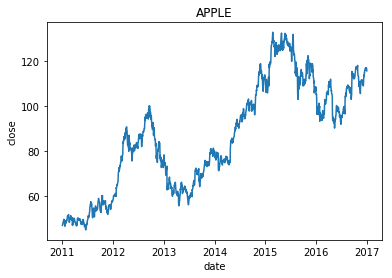

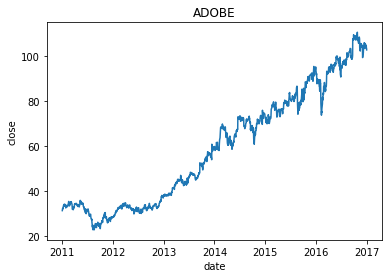

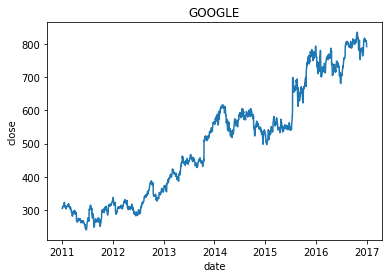

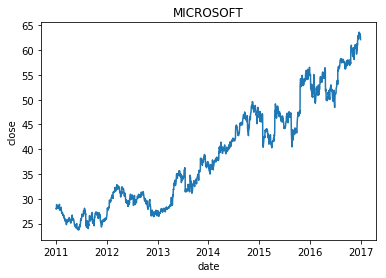

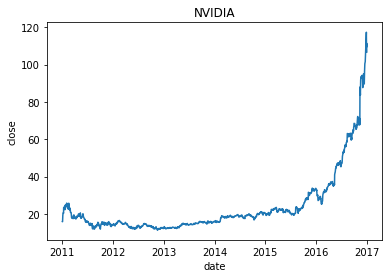

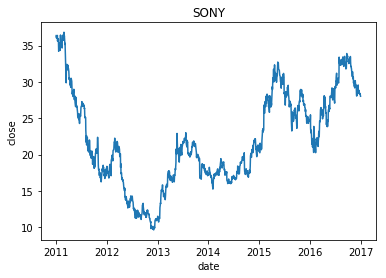

In [5]:
for name in Globals:
    draw(name, "close")

In [6]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     print(data,n_in,n_out)
    n_vars = 1 if type(data) is list else list(data.columns)
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (j, i)) for j in n_vars]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (j)) for j in n_vars]
        else:
            names += [('%s(t+%d)' % (j, i)) for j in n_vars]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [61]:
window=5
var=["open","close","high","low"]
future=3
train=APPLE11
test=APPLE12

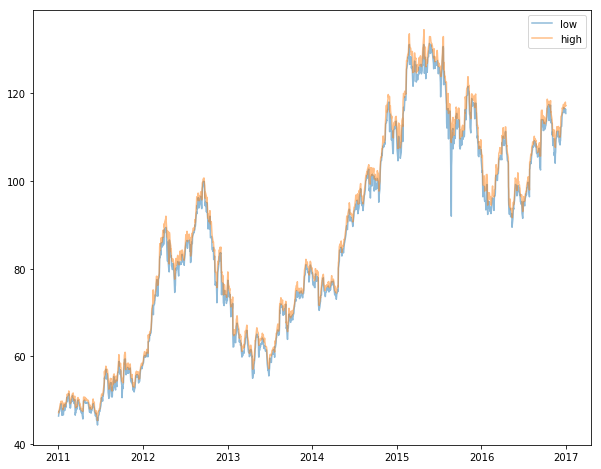

In [62]:
pp.figure(figsize=(10,8))
pp.plot(pd.to_datetime(APPLE["date"]), APPLE[["low","high"]],alpha=0.5)

pp.legend(["low","high"])

In [63]:
raw=series_to_supervised(data[var],window,future)

In [64]:
from sklearn.preprocessing import MinMaxScaler

def get_X_y(data,window,future):
    raw=series_to_supervised(data[var],window,future)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    X=scaler.fit_transform(raw[raw.columns[:len(var)*window]].values)
    y=scaler.fit_transform(raw[raw.columns[len(var)*window:]].values)
    
#     print(X.head(5),y.head(5))
    # reshape input to be 3D [samples, timesteps, features]
    
    return X.reshape((X.shape[0], 1, X.shape[1])),y.reshape((y.shape[0], 1, y.shape[1]))

In [67]:
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
from keras.models import Sequential
window=10
var=["open","close","high","low"]
future=6
train=APPLE11
test=APPLE12

def try_model(train,test):
    X_train,y_train=get_X_y(train,window,future)
    X_test,y_test=get_X_y(test,window,future)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    model = Sequential()
#     model.add(LSTM(100,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(SimpleRNN(512,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(SimpleRNN(512,return_sequences=True))
    # model.add(Dropout(0.5))

    # model.add(GRU(15))
    
    model.add(LSTM(87,return_sequences=True))
#     model.add(GRU(units=512,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))

    
#     model.add(SimpleRNN(512,return_sequences=True))
    model.add(GRU(units=512,return_sequences=True,input_shape=(None, X_train.shape[0],)))
#     model.add(LSTM(100,return_sequences=True))
#     model.add(Dropout(0.1))
    model.add(Dense(future*len(var)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.summary()
    
    history = model.fit(X_train, y_train, epochs=500, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
    return (model,history)

In [68]:
data=APPLE
for i in Globals[1:]:
    df=eval(i)
    data=data.append(df)
h=try_model(data,APPLE16)


(9045, 1, 40) (9045, 1, 24) (237, 1, 40) (237, 1, 24)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1, 512)            283136    
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 87)             208800    
_________________________________________________________________
gru_3 (GRU)                  (None, 1, 512)            921600    
_________________________________________________________________
dense_3 (Dense)              (None, 1, 24)             12312     
Total params: 1,425,848
Trainable params: 1,425,848
Non-trainable params: 0
_________________________________________________________________
Train on 9045 samples, validate on 237 samples
Epoch 1/500
 - 8s - loss: 0.0141 - val_loss: 0.0683
Epoch 2/500
 - 6s - loss: 0.0086 - val_loss: 0.0579
Epoch 3/500
 - 5s - loss: 0.0085 - val_loss: 0.0761
Epoch 4

Epoch 137/500
 - 4s - loss: 9.2850e-04 - val_loss: 0.0274
Epoch 138/500
 - 5s - loss: 0.0014 - val_loss: 0.0212
Epoch 139/500
 - 4s - loss: 9.4923e-04 - val_loss: 0.0276
Epoch 140/500
 - 5s - loss: 0.0010 - val_loss: 0.0193
Epoch 141/500
 - 4s - loss: 0.0014 - val_loss: 0.0940
Epoch 142/500
 - 6s - loss: 0.0039 - val_loss: 0.0235
Epoch 143/500
 - 4s - loss: 0.0020 - val_loss: 0.0744
Epoch 144/500
 - 4s - loss: 0.0034 - val_loss: 0.0292
Epoch 145/500
 - 5s - loss: 0.0027 - val_loss: 0.0538
Epoch 146/500
 - 5s - loss: 0.0034 - val_loss: 0.0186
Epoch 147/500
 - 4s - loss: 0.0023 - val_loss: 0.0163
Epoch 148/500
 - 5s - loss: 0.0017 - val_loss: 0.0208
Epoch 149/500
 - 5s - loss: 0.0012 - val_loss: 0.0208
Epoch 150/500
 - 5s - loss: 8.2038e-04 - val_loss: 0.0137
Epoch 151/500
 - 5s - loss: 8.8076e-04 - val_loss: 0.0166
Epoch 152/500
 - 4s - loss: 9.5270e-04 - val_loss: 0.0240
Epoch 153/500
 - 4s - loss: 9.6580e-04 - val_loss: 0.0398
Epoch 154/500
 - 5s - loss: 0.0067 - val_loss: 0.0596
Epoc

Epoch 287/500
 - 6s - loss: 7.0468e-04 - val_loss: 0.0145
Epoch 288/500
 - 6s - loss: 7.1166e-04 - val_loss: 0.0215
Epoch 289/500
 - 6s - loss: 7.4671e-04 - val_loss: 0.0140
Epoch 290/500
 - 6s - loss: 8.6844e-04 - val_loss: 0.0175
Epoch 291/500
 - 6s - loss: 6.1726e-04 - val_loss: 0.0161
Epoch 292/500
 - 6s - loss: 0.0015 - val_loss: 0.0200
Epoch 293/500
 - 6s - loss: 0.0021 - val_loss: 0.0194
Epoch 294/500
 - 7s - loss: 0.0020 - val_loss: 0.0244
Epoch 295/500
 - 6s - loss: 0.0012 - val_loss: 0.0184
Epoch 296/500
 - 6s - loss: 0.0025 - val_loss: 0.0258
Epoch 297/500
 - 6s - loss: 0.0022 - val_loss: 0.0164
Epoch 298/500
 - 6s - loss: 0.0015 - val_loss: 0.0253
Epoch 299/500
 - 6s - loss: 0.0018 - val_loss: 0.0314
Epoch 300/500
 - 6s - loss: 0.0039 - val_loss: 0.0168
Epoch 301/500
 - 6s - loss: 0.0029 - val_loss: 0.0369
Epoch 302/500
 - 6s - loss: 0.0024 - val_loss: 0.0619
Epoch 303/500
 - 6s - loss: 0.0043 - val_loss: 0.0147
Epoch 304/500
 - 6s - loss: 0.0017 - val_loss: 0.0144
Epoch 30

Epoch 433/500
 - 5s - loss: 6.0680e-04 - val_loss: 0.0137
Epoch 434/500
 - 5s - loss: 5.9326e-04 - val_loss: 0.0143
Epoch 435/500
 - 5s - loss: 6.8291e-04 - val_loss: 0.0177
Epoch 436/500
 - 5s - loss: 7.6476e-04 - val_loss: 0.0141
Epoch 437/500
 - 6s - loss: 7.1787e-04 - val_loss: 0.0226
Epoch 438/500
 - 5s - loss: 0.0010 - val_loss: 0.0205
Epoch 439/500
 - 5s - loss: 0.0019 - val_loss: 0.0194
Epoch 440/500
 - 5s - loss: 0.0014 - val_loss: 0.0229
Epoch 441/500
 - 5s - loss: 0.0014 - val_loss: 0.0220
Epoch 442/500
 - 5s - loss: 0.0026 - val_loss: 0.0146
Epoch 443/500
 - 5s - loss: 9.1005e-04 - val_loss: 0.0186
Epoch 444/500
 - 6s - loss: 7.9127e-04 - val_loss: 0.0163
Epoch 445/500
 - 5s - loss: 0.0010 - val_loss: 0.0157
Epoch 446/500
 - 6s - loss: 7.2681e-04 - val_loss: 0.0149
Epoch 447/500
 - 6s - loss: 6.2374e-04 - val_loss: 0.0159
Epoch 448/500
 - 6s - loss: 6.3031e-04 - val_loss: 0.0144
Epoch 449/500
 - 6s - loss: 6.5809e-04 - val_loss: 0.0150
Epoch 450/500
 - 6s - loss: 6.7085e-04

In [69]:
h[0].save("model.h5")

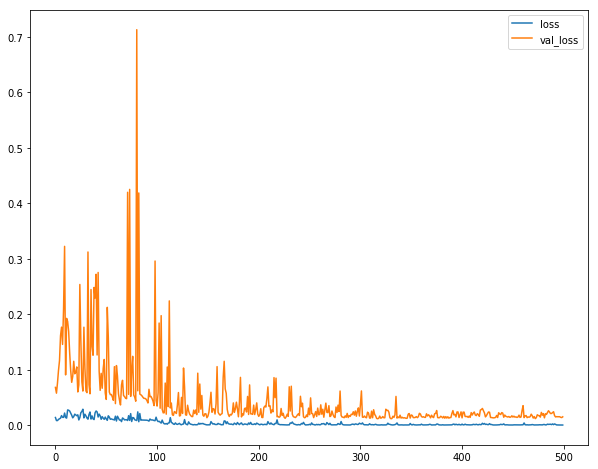

In [70]:
pp.figure(figsize=(10,8))
pp.plot(h[1].history["loss"])
pp.plot(h[1].history["val_loss"])
pp.legend(["loss","val_loss"])

In [71]:
X_test,y_test=get_X_y(APPLE16,window,future)
res=h[0].predict(X_test)

In [ ]:
res[0].reshape(future,len(var))

In [ ]:
date(APPLE11["date"].tail(1))

In [33]:
pp.figure(figsize=(10,8))
pp.plot(h.history["loss"])
pp.plot(h.history["val_loss"])
pp.legend(["loss","val_loss"])

AttributeError: 'tuple' object has no attribute 'history'

<Figure size 720x576 with 0 Axes>

In [39]:
series_to_supervised(data[var],window,future)[["open(t-5)","close(t-5)","high(t-5)","low(t-5)","open(t+2)","close(t+2)","high(t+2)","low(t+2)"]].corr()

,open(t-5),close(t-5),high(t-5),low(t-5),open(t+2),close(t+2),high(t+2),low(t+2)
open(t-5),1.000000,0.999909,0.999964,0.999946,0.991464,0.991590,0.991580,0.991506
close(t-5),0.999909,1.000000,0.999953,0.999964,0.991379,0.991506,0.991497,0.991424
high(t-5),0.999964,0.999953,1.000000,0.999943,0.991460,0.991583,0.991581,0.991497
low(t-5),0.999946,0.999964,0.999943,1.000000,0.991371,0.991504,0.991486,0.991427
open(t+2),0.991464,0.991379,0.991460,0.991371,1.000000,0.999909,0.999964,0.999946
close(t+2),0.991590,0.991506,0.991583,0.991504,0.999909,1.000000,0.999953,0.999964
high(t+2),0.991580,0.991497,0.991581,0.991486,0.999964,0.999953,1.000000,0.999943
low(t+2),0.991506,0.991424,0.991497,0.991427,0.999946,0.999964,0.999943,1.000000


In [159]:
aptest=pd.read_csv("Data/TEST.csv")[["Open","Close","High","Low"]]
aptest.shape

(21, 4)

In [160]:
a=series_to_supervised(aptest.tail(window+future)[["Open","Close","High","Low"]],window,future)


In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))
a=scaler.fit_transform(a)
a=a.reshape((a.shape[0],1,a.shape[1]))[:,:,:40]
print(a)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [162]:
y=h[0].predict(a).reshape(future,len(var))

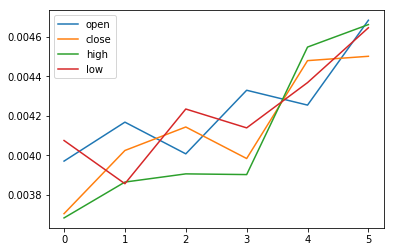

In [164]:
pp.plot(y)
pp.legend(var)

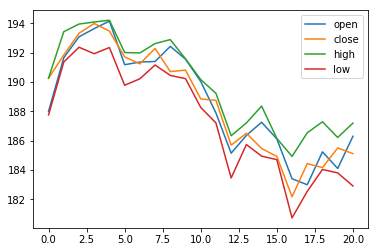

In [165]:
pp.plot(aptest)
pp.legend(var)